In [1]:
import awkward as ak
import numpy as np
import uproot
import vector

from coffea import processor
from coffea import nanoevents
from coffea.nanoevents.methods import candidate
from coffea.nanoevents   import NanoEventsFactory, NanoAODSchema
from coffea.analysis_tools import Weights, PackedSelection
from qawa.common import pileup_weights, ewk_corrector, met_phi_xy_correction, theory_ps_weight, theory_pdf_weight

In [19]:
# fname = 'root://xcache//store/mc/RunIISummer20UL18NanoAODv9/ZZTo2L2Nu_TuneCP5_13TeV_powheg_pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/130000/80AE5A11-3998-8141-A11B-55C9EE524378.root'
# fname = 'root://xcache//store/mc/RunIISummer20UL18NanoAODv9/WZTo3LNu_TuneCP5_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v2/2500000/B99CFD46-B7B6-154A-869F-D839156FA90E.root'
# fname = 'root://xcache//store/data/Run2017B/DoubleEG/NANOAOD/UL2017_MiniAODv2_NanoAODv9-v1/70000/4BC53825-C4CC-264D-B251-87375F80A49E.root'
# fname = 'root://xcache//store/mc/RunIISummer20UL17NanoAODv2/DYJetsToTauTau_M-50_AtLeastOneEorMuDecay_massWgtFix_TuneCP5_13TeV-powhegMiNNLO-pythia8-photos/NANOAODSIM/106X_mc2017_realistic_v8-v1/110000/49F422B9-E5A4-0348-A1CC-E6A8C38DD390.root'
fname = "root://eoscms.cern.ch//store/user/biwang/aQGC/ZZ2JTo2L2Nu2J_EWK_aQGC_TuneCP5_13TeV-madgraph-pythia8/NanoAODv9_UL2018_v2/220728_132906/0000/tree_1.root"

events = NanoEventsFactory.from_root(
    fname,
    schemaclass=NanoAODSchema.v6,
    metadata={"dataset": "ZZ2l2nu"},
).events()

In [26]:
len(events.LHEReweightingWeight[0,:])

1057

In [4]:
# weights = Weights(len(events), storeIndividual=True)

In [5]:
# corrector = ewk_corrector(process='WZ')

In [62]:
# corr = corrector.get_weight(events.GenPart, events.Generator.x1, events.Generator.x2, weights)
# corr

In [63]:
import matplotlib.pyplot as plt

In [64]:
# parton = events.GenPart
# bosons = parton[
#     ((np.abs(parton.pdgId) == 23) & (parton.status==22)) |
#     ((np.abs(parton.pdgId) == 24) & (parton.status==22)) 
# ]

# v1 = bosons[ak.num(bosons)>1][:,0]
# v2 = bosons[ak.num(bosons)>1][:,1]
# vv = v1 + v2

# ha,e,_ = plt.hist(vv.pt, bins=10**np.linspace(0.1,3, 20), histtype='step', 
#                   weights=events.genWeight[ak.num(bosons)>1], 
#                   label='no correction')
# hc,_,_ = plt.hist(vv.pt, bins=10**np.linspace(0.1,3, 20), histtype='step', 
#                   weights=(events.genWeight*weights.weight())[ak.num(bosons)>1], 
#                   label='NLO EW', color='k')

# # hnnlo,_,_ = plt.hist(vv.pt, bins=10**np.linspace(0.1,3, 20), histtype='step', 
# #                   weights=(events.genWeight*weights.partial_weight(include=['kNNLO']))[ak.num(bosons)>1], 
# #                   label='NNLO QCD', color='g')
# hu,_,_ = plt.hist(vv.pt, bins=10**np.linspace(0.1,3, 20), histtype='step', 
#          weights=(events.genWeight*weights.weight(modifier='kEWUp'))[ak.num(bosons)>1], color='red')
# hd,_,_ = plt.hist(vv.pt, bins=10**np.linspace(0.1,3, 20), histtype='step', 
#          weights=(events.genWeight*weights.weight(modifier='kEWDown'))[ak.num(bosons)>1], color='red')

# plt.legend()
# # plt.yscale('log')
# plt.xscale('log')
# plt.show()

In [65]:
# plt.plot(e[:-1]+np.diff(e), hc/ha) 

# plt.plot(e[:-1]+np.diff(e), hu/ha) 
# plt.plot(e[:-1]+np.diff(e), hd/ha) 
# plt.xscale('log')

In [66]:
events.run 

<Array [297050, 297050, ... 299064, 299064] type='2145083 * uint32[parameters={"...'>

In [67]:
# ak.where((events.run >= 315252) & (events.run <= 316995), -(-0.0478335*npv -0.108032), 1.0)

In [68]:
run = events.run
npv = events.PV.npvs

pt, phi = met_phi_xy_correction(events, is_mc=False, era='2016')

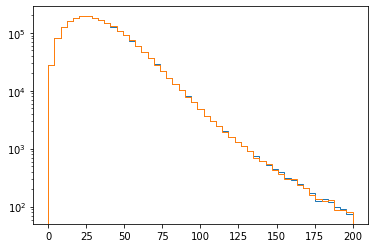

In [69]:
ha,v,_ = plt.hist(events.MET.pt, bins=np.linspace(0,200,50), histtype='step')
hb,_,_ = plt.hist(pt, bins=np.linspace(0,200,50), histtype='step')

plt.yscale('log')
plt.show()

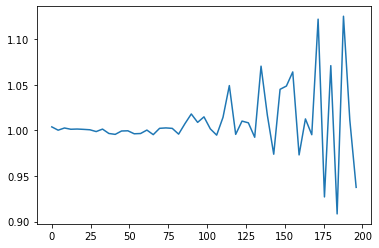

In [70]:
plt.plot(v[:-1], ha/hb)

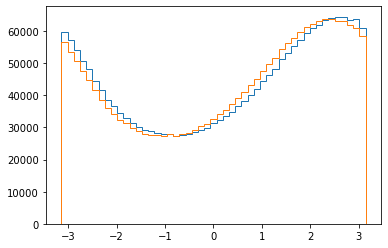

In [71]:
plt.hist(events.MET.phi, bins=np.linspace(-np.pi,np.pi,50), histtype='step')
plt.hist(phi    , bins=np.linspace(-np.pi,np.pi,50), histtype='step')

# plt.yscale('log')
plt.show()

In [72]:
# HEM15/16 issue
# _runid = (events.run >= 319077)
# j_mask = ak.where((jets.phi > -1.57) & (jets.phi < -0.87) &
#                   (jets.eta > -2.50) & (jets.eta <  1.30) & 
#                   _runid, 0.8, 1)

# shift_jets = copy.deepcopy(jets)
# shift_jets.pt   = j_mask * shift_jets.pt
# shift_jets.mass = j_mask * shift_jets.mass
# shifts.extend([
#     ({"Jet": shift_jets, "MET": met}, "HEM18"),
# ])
# x-y met shit corrections

In [73]:
import copy

In [74]:
met = events.MET

shift_met = copy.deepcopy(met)

In [75]:
shift_met.fields

['MetUnclustEnUpDeltaX',
 'MetUnclustEnUpDeltaY',
 'covXX',
 'covXY',
 'covYY',
 'phi',
 'pt',
 'significance',
 'sumEt',
 'sumPtUnclustered']

In [76]:
shift_met['pt'] = pt
shift_met['phi'] = phi

In [77]:
shift_met.pt

<Array [114, 63.7, 39.4, ... 19.1, 8.29, 23] type='2145083 * float64'>

In [78]:
met.pt

<Array [115, 64, 40, 138, ... 17.8, 7.01, 24.2] type='2145083 * float32[paramete...'>

In [79]:
met["pt"] = pt

In [80]:
met.pt

<Array [114, 63.7, 39.4, ... 19.1, 8.29, 23] type='2145083 * float64'>

In [81]:
events.MET.pt

<Array [115, 64, 40, 138, ... 17.8, 7.01, 24.2] type='2145083 * float32[paramete...'>

In [82]:
def update_collection(event, coll):
    out = event
    for name, value in coll.items():
        out = ak.with_field(out, value, name)
    return out

In [89]:
met_p4 = ak.zip(
    {
        "pt": events.MET.pt,
        "eta": ak.zeros_like(events.MET.pt),
        "phi": events.MET.phi,
        "mass": ak.zeros_like(events.MET.pt),
        "charge": ak.zeros_like(events.MET.pt),
    },
    with_name="PtEtaPhiMCandidate",
    behavior=candidate.behavior,
)

In [91]:
jet_p4 = ak.zip(
    {
        "pt": ak.firsts(events.Jet).pt,
        "eta": ak.firsts(events.Jet).eta,
        "phi": ak.firsts(events.Jet).phi,
        "mass": ak.firsts(events.Jet).mass,
        "charge": ak.zeros_like(events.MET.pt),
    },
    with_name="PtEtaPhiMCandidate",
    behavior=candidate.behavior,
)

In [94]:
met_p4.p

<Array [115, 64, 40, 138, ... 17.8, 7.01, 24.2] type='2145083 * float32'>

In [99]:
met_p4.pvec

<ThreeVectorArray [{x: -106, y: 45.4, z: 0, ... z: 0}] type='2145083 * ThreeVect...'>

In [96]:
jet_p4.p

<Array [124, 114, 80.9, 141, ... 133, 278, 214] type='2145083 * ?float32'>

In [98]:
jet_p4.pvec

<ThreeVectorArray [{x: 90.9, y: 23.4, ... z: -196}] type='2145083 * ThreeVector[...'>

In [101]:
ss = (jet_p4.pvec + met_p4.pvec)

In [109]:
ss.p2

11399.693359375

In [105]:
ss[0]

<ThreeVectorRecord {x: -14.7, y: 68.8, z: 80.3} type='ThreeVector["x": ?float32,...'>

In [108]:
14.7**2 + 68.8**2 + 80.3**2

11397.619999999999

In [103]:
dir(ss)

['Mask',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__self_class__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__thisclass__',
 '_behavior',
 '_caches',
 '_layout',
 '_numbaview',
 'absolute',
 'add',
 'behavior',
 'caches',
 'cross',
 'delta_phi',
 'divide',
 'dot',
 'fields',
 'layout',
 'mask',
 'multiply',
 'nbytes',
 'ndim',
 'negative',
 'numba_type',
 'p',
 'p2',
 'phi',
 'pt',
 'pt2',
 'px',
 'py',
 'pz',
 'r',
 'r2',
 'rho',
 'rho2',
 'slot0',
 'slot1',
 'slot2',
 'slot3',
 'slot4',
 'slot5',
 'slot6',
 'slot7',
 'slot8',
 'slot9',
 'subtract',
 'sum',
 'theta',
 'to_list',
 'to_numpy',
 'tolist',
 'type',
 'unit',
 'x',
 'y',
 'z']

In [17]:
f = open('qawa/data/eft-names.dat')

In [18]:
[n.strip() for n in f.readlines()]

['sm',
 'FS0_0p1',
 'FS0_0p2',
 'FS0_0p3',
 'FS0_0p5',
 'FS0_1',
 'FS0_2',
 'FS0_4',
 'FS0_8',
 'FS0_16',
 'FS0_32',
 'FS0_64',
 'FS0_128',
 'FS0_m0p1',
 'FS0_m0p2',
 'FS0_m0p3',
 'FS0_m0p5',
 'FS0_m1',
 'FS0_m2',
 'FS0_m4',
 'FS0_m8',
 'FS0_m16',
 'FS0_m32',
 'FS0_m64',
 'FS0_m128',
 'FS1_0p1',
 'FS1_0p2',
 'FS1_0p3',
 'FS1_0p5',
 'FS1_1',
 'FS1_2',
 'FS1_4',
 'FS1_8',
 'FS1_16',
 'FS1_32',
 'FS1_64',
 'FS1_128',
 'FS1_m0p1',
 'FS1_m0p2',
 'FS1_m0p3',
 'FS1_m0p5',
 'FS1_m1',
 'FS1_m2',
 'FS1_m4',
 'FS1_m8',
 'FS1_m16',
 'FS1_m32',
 'FS1_m64',
 'FS1_m128',
 'FS2_0p1',
 'FS2_0p2',
 'FS2_0p3',
 'FS2_0p5',
 'FS2_1',
 'FS2_2',
 'FS2_4',
 'FS2_8',
 'FS2_16',
 'FS2_32',
 'FS2_64',
 'FS2_128',
 'FS2_m0p1',
 'FS2_m0p2',
 'FS2_m0p3',
 'FS2_m0p5',
 'FS2_m1',
 'FS2_m2',
 'FS2_m4',
 'FS2_m8',
 'FS2_m16',
 'FS2_m32',
 'FS2_m64',
 'FS2_m128',
 'FM0_0p1',
 'FM0_0p2',
 'FM0_0p3',
 'FM0_0p5',
 'FM0_1',
 'FM0_2',
 'FM0_4',
 'FM0_8',
 'FM0_16',
 'FM0_32',
 'FM0_64',
 'FM0_128',
 'FM0_m0p1',
 'FM0_m0p2',
